In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import re

import statsmodels as sm
import warnings
warnings.filterwarnings("ignore")

In [111]:
df = pd.read_csv('bank-additional-full.csv', sep=';' )
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [112]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [113]:
df['default'] = df['default'].apply(lambda x: 'unknown' if x == 'yes' else x)

In [114]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [115]:
df['education'] = df['education'].apply(lambda x: 'basic' if x in ['basic.9y', 'basic.4y', 'basic.6y'] else x)
# option !!!
df['education'] = df['education'].apply(lambda x: 'university.degree' if x == 'unknown' else x)
df['education'].value_counts()

university.degree      13899
basic                  12513
high.school             9515
professional.course     5243
illiterate                18
Name: education, dtype: int64

In [116]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [117]:
list_age = df[df['job'] == 'unknown']['age'].value_counts().index
list_age

Int64Index([45, 55, 53, 44, 35, 41, 32, 34, 38, 50, 49, 52, 47, 43, 56, 46, 60,
            58, 30, 59, 57, 42, 48, 27, 28, 24, 64, 26, 36, 37, 61, 33, 31, 25,
            81, 40, 51, 66, 54, 63, 78, 76, 65, 29, 69, 72, 62, 67],
           dtype='int64')

In [118]:
for age in list_age:
    df.loc[((df['age'] == age) & (df['job'] == 'unknown')), ['job']] = df[df['age'] == age]['job'].value_counts().idxmax()

In [119]:
df['job'].value_counts()

admin.           10547
blue-collar       9409
technician        6743
services          3969
management        2924
retired           1764
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            881
Name: job, dtype: int64

In [120]:
# encoding month and day_of_week sang dạng số

In [121]:
month = {'jan': 1,
         'feb': 2,
         'mar': 3,
         'apr': 4,
         'may': 5,
         'jun': 6,
         'jul': 7,
         'aug': 8,
         'sep': 9,
         'oct': 10,
         'nov': 11,
         'dec': 12}

df['month'] = df['month'].map(month)
df['month']

0         5
1         5
2         5
3         5
4         5
         ..
41183    11
41184    11
41185    11
41186    11
41187    11
Name: month, Length: 41188, dtype: int64

In [122]:
df['month'].value_counts()

5     13769
7      7174
8      6178
6      5318
11     4101
4      2632
10      718
9       570
3       546
12      182
Name: month, dtype: int64

In [123]:
day_of_week = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
df['day_of_week'] = df['day_of_week'].map(day_of_week)

In [124]:
df['day_of_week'].value_counts()

4    8623
1    8514
3    8134
2    8090
5    7827
Name: day_of_week, dtype: int64

In [125]:
job_encode_df = pd.get_dummies(df['job'], prefix= 'job')
job_encode_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,0
41184,0,1,0,0,0,0,0,0,0,0,0
41185,0,0,0,0,0,1,0,0,0,0,0
41186,0,0,0,0,0,0,0,0,0,1,0


In [126]:
marital_encode_df = pd.get_dummies(df['marital'], prefix= 'marital')
marital_encode_df

,marital_divorced,marital_married,marital_single,marital_unknown
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
41183,0,1,0,0
41184,0,1,0,0
41185,0,1,0,0
41186,0,1,0,0


In [127]:
contact_encode_df = pd.get_dummies(df['contact'], prefix= 'contact')
contact_encode_df

,contact_cellular,contact_telephone
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
41183,1,0
41184,1,0
41185,1,0
41186,1,0


In [128]:
df['education'] = df['education'].str.replace('basic.\w+', 'basic', regex= True)
cat_df = pd.Categorical(df['education'], categories= ['unknown', 'illiterate', 'basic', 'high.school', 'university.degree', 'professional.course'])
df['education'] = cat_df.codes

In [129]:
poutcome_encode_df = pd.get_dummies(df['poutcome'], prefix= 'poutcome')
poutcome_encode_df

,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
41183,0,1,0
41184,0,1,0
41185,0,1,0
41186,0,1,0


In [130]:
df = pd.concat([df, job_encode_df, marital_encode_df, poutcome_encode_df, contact_encode_df], axis= 1)
df.drop(['job', 'marital', 'poutcome', 'contact'], axis= 1, inplace= True)
df

,age,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,job_unemployed,marital_divorced,marital_married,marital_single,marital_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,2,no,no,no,5,1,261,1,999,...,0,0,1,0,0,0,1,0,0,1
1,57,3,unknown,no,no,5,1,149,1,999,...,0,0,1,0,0,0,1,0,0,1
2,37,3,no,yes,no,5,1,226,1,999,...,0,0,1,0,0,0,1,0,0,1
3,40,2,no,no,no,5,1,151,1,999,...,0,0,1,0,0,0,1,0,0,1
4,56,3,no,no,yes,5,1,307,1,999,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,no,yes,no,11,5,334,1,999,...,0,0,1,0,0,0,1,0,1,0
41184,46,5,no,no,no,11,5,383,1,999,...,0,0,1,0,0,0,1,0,1,0
41185,56,4,no,yes,no,11,5,189,2,999,...,0,0,1,0,0,0,1,0,1,0
41186,44,5,no,no,no,11,5,442,1,999,...,0,0,1,0,0,0,1,0,1,0


In [131]:
from sklearn.preprocessing import LabelEncoder
df[['housing', 'loan', 'default']] = df[['housing', 'loan', 'default']].apply(LabelEncoder().fit_transform)

In [132]:
df

,age,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,job_unemployed,marital_divorced,marital_married,marital_single,marital_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,2,0,0,0,5,1,261,1,999,...,0,0,1,0,0,0,1,0,0,1
1,57,3,1,0,0,5,1,149,1,999,...,0,0,1,0,0,0,1,0,0,1
2,37,3,0,2,0,5,1,226,1,999,...,0,0,1,0,0,0,1,0,0,1
3,40,2,0,0,0,5,1,151,1,999,...,0,0,1,0,0,0,1,0,0,1
4,56,3,0,0,2,5,1,307,1,999,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,2,0,11,5,334,1,999,...,0,0,1,0,0,0,1,0,1,0
41184,46,5,0,0,0,11,5,383,1,999,...,0,0,1,0,0,0,1,0,1,0
41185,56,4,0,2,0,11,5,189,2,999,...,0,0,1,0,0,0,1,0,1,0
41186,44,5,0,0,0,11,5,442,1,999,...,0,0,1,0,0,0,1,0,1,0


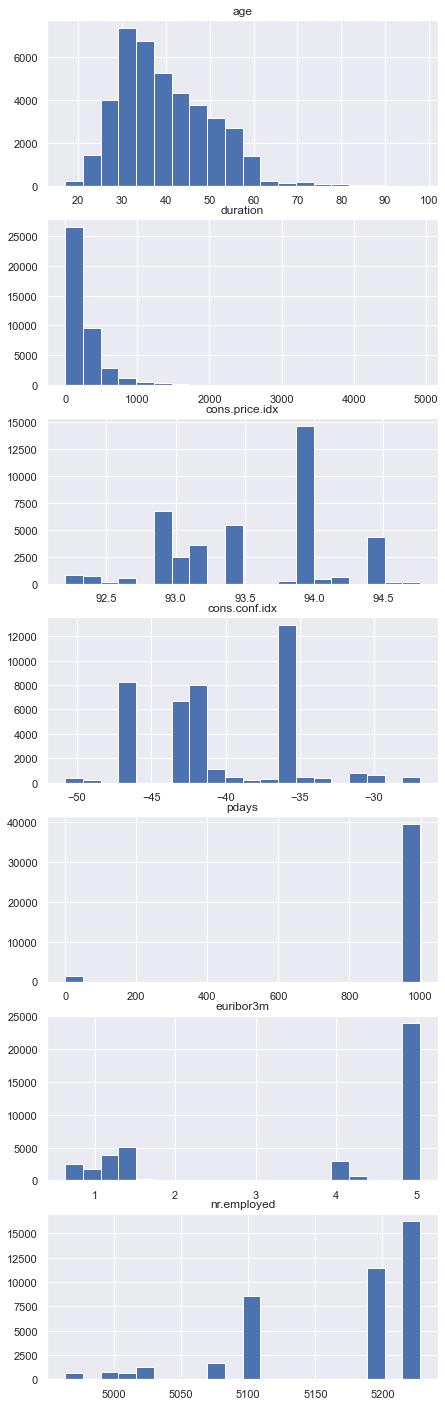

In [140]:
fig, ax = plt.subplots(7, 1, figsize= [7, 25])
alist = ['age', 'duration', 'cons.price.idx', 'cons.conf.idx', 'pdays', 'euribor3m', 'nr.employed']

for i, col in enumerate(alist):
    ax[i].hist(df[col], bins= 20)
    ax[i].set_title(col)

In [149]:
from sklearn.preprocessing import MinMaxScaler
df['duration'] = df['duration'].apply(lambda x: np.log(x + 0.0001))

for col in ['age', 'duration', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']:
    df[col] = MinMaxScaler().fit_transform(df[[col]])


In [147]:
#df[['age', 'duration', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']].apply(MinMaxScaler().fit_transform)

ValueError: Expected 2D array, got 1D array instead:
array=[56. 57. 37. ... 56. 44. 74.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [150]:
df.drop(['job', 'marital', 'poutcome', 'contact'], axis= 1, inplace= True)

KeyError: "['job', 'marital', 'poutcome', 'contact'] not found in axis"

In [151]:
df.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'contact_cellular', 'contact_telephone'],
      dtype='object')